In [1]:
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from bounded_rand_walkers.cpp import freehand as cpp_freehand
from bounded_rand_walkers.cpp import freehand2 as cpp_freehand2
from bounded_rand_walkers.functions import Freehand
from bounded_rand_walkers.utils import normalise

mpl.rc_file("matplotlibrc")

In [2]:
c1 = (13 / 3) * np.abs(np.sinc(7.4 / 3))
c2 = (5 / 3) * c1 * 0.001 ** (1 / 4)


def compact(l):
    """PDF defined up to a factor."""
    if (l > 0) and (l <= 2 / 3):
        return l * (1 + 5 * l) * np.abs(np.sinc(3.7 * l))
    elif (l > 2 / 3) and (l <= 4 / 3):
        return c1 * l * (1 / 3 + l)
    elif (l > 4 / 3) and (l <= 3):
        return c2 * l * (np.abs(4 / 3 - l) + 0.001) ** (-1 / 4)
    else:
        return 0


def compact2(l):
    """Scaled PDF defined up to a factor."""
    if (l > 0) and (l <= 1 / 3):
        return l * (1 + 10 * l) * np.abs(np.sinc(7.4 * l))
    elif (l > 1 / 3) and (l <= 2 / 3):
        return c1 * l * (1 / 3 + 2 * l)
    elif (l > 2 / 3) and (l <= 1.6):
        return c2 * l * (2 * np.abs(2 / 3 - l) + 0.001) ** (-1 / 4)
    else:
        return 0

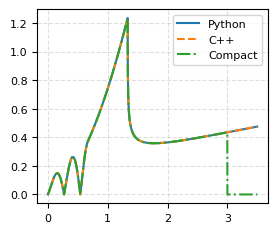

In [3]:
ls = np.linspace(0, 3.5, 10000)
py_freehand = Freehand(width=2)
plt.plot(ls, [l * py_freehand(np.array([l])) for l in ls], label="Python")
plt.plot(
    ls,
    [l * cpp_freehand(np.array([l]), width=2) for l in ls],
    linestyle="--",
    label="C++",
)
plt.plot(
    ls,
    [compact(l) for l in ls],
    linestyle="-.",
    label=r"Compact",
)
_ = plt.legend()

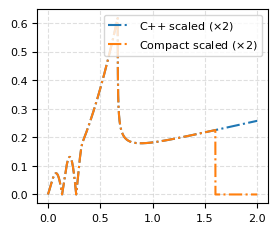

In [4]:
ls = np.linspace(0, 2, 10000)
plt.plot(
    ls,
    [l * cpp_freehand2(np.array([l]), width=2) for l in ls],
    linestyle="-.",
    label=r"C++ scaled ($\times2$)",
)
plt.plot(
    ls,
    [compact2(l) for l in ls],
    linestyle="-.",
    label=r"Compact scaled ($\times2$)",
)
_ = plt.legend()

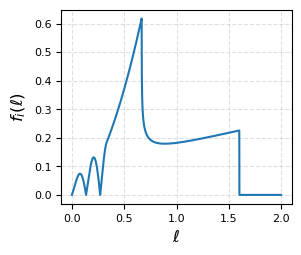

In [5]:
ls = np.linspace(0, 2, 10000)
plt.plot(
    ls,
    [compact2(l) for l in ls],
    linestyle="-",
)
plt.xlabel(r"$\ell$")
plt.ylabel(r"$f_i(\ell)$")
plt.savefig((Path("plots") / f"compact_pdf").with_suffix(".png"))

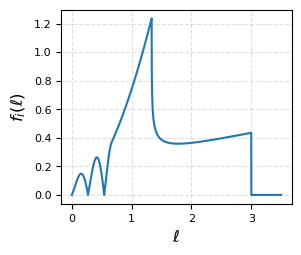

In [6]:
ls = np.linspace(0, 3.5, 10000)
plt.plot(
    ls,
    [compact(l) for l in ls],
    linestyle="-",
)
plt.xlabel(r"$\ell$")
plt.ylabel(r"$f_i(\ell)$")
plt.savefig((Path("plots") / f"normal_pdf").with_suffix(".png"))